In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Downloads/Data file.csv')

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.shape

(209593, 37)

In [5]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [6]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

#### EDA

1. Unnamed: 0

In [7]:
df['Unnamed: 0'].unique()

array([     1,      2,      3, ..., 209591, 209592, 209593], dtype=int64)

In [8]:
df['Unnamed: 0'].isnull().sum()

0

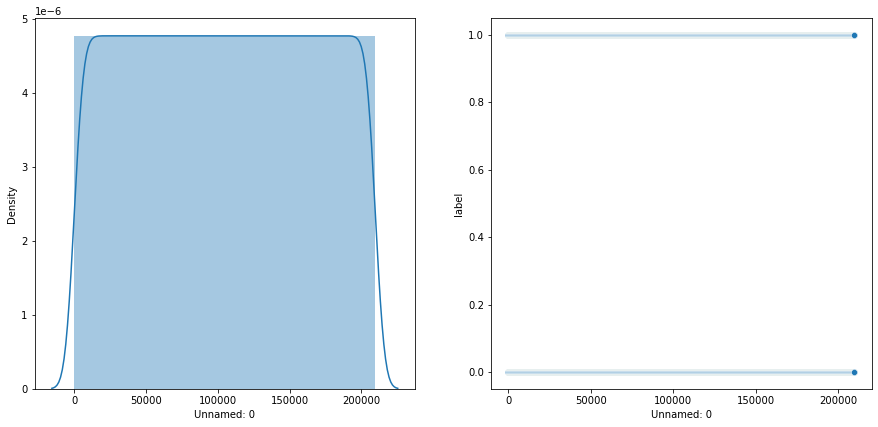

In [9]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['Unnamed: 0'])
plt.xlabel('Unnamed: 0')
plt.subplot(222)
sns.scatterplot(x= 'Unnamed: 0', y= 'label', data= df)
plt.xlabel('Unnamed: 0')
plt.ylabel('label')
plt.show()

2. msisdn

In [10]:
df['msisdn'].unique()

array(['21408I70789', '76462I70374', '17943I70372', ..., '22758I85348',
       '59712I82733', '65061I85339'], dtype=object)

In [11]:
df['msisdn'].isnull().sum()

0

In [12]:
ab = []
for i in df['msisdn']:
    i = i[0]
    ab.append(i)

In [13]:
df['msisdn'] = pd.Series(ab)

In [14]:
df['msisdn'].unique()

array(['2', '7', '1', '5', '0', '3', '9', '8', '6', '4'], dtype=object)

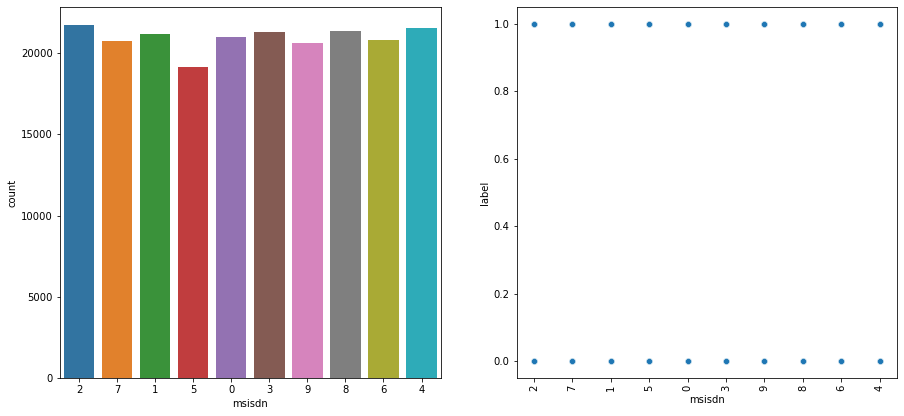

In [15]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['msisdn'])
plt.xlabel('msisdn')
plt.subplot(222)
sns.scatterplot(x= 'msisdn', y= 'label', data= df)
plt.xlabel('msisdn')
plt.xticks(rotation= 90)
plt.ylabel('label')
plt.show()

3. aon

In [16]:
df['aon'].unique()

array([2.72000000e+02, 7.12000000e+02, 5.35000000e+02, ...,
       8.03380622e+05, 5.81435484e+05, 8.11881373e+05])

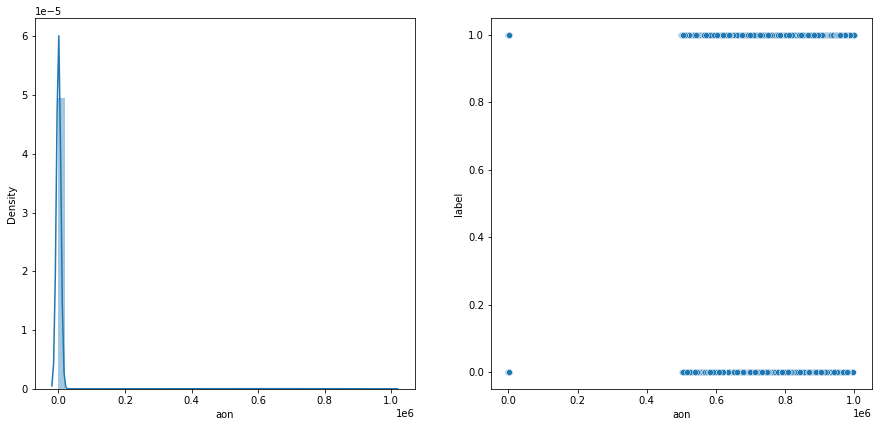

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['aon'])
plt.xlabel('aon')
plt.subplot(222)
sns.scatterplot(x= 'aon', y= 'label', data= df)
plt.xlabel('aon')
plt.ylabel('label')
plt.show()

4. daily_decr30

In [18]:
df['daily_decr30'].unique()

array([ 3055.05      , 12122.        ,  1398.        , ...,
       11843.11166667, 12488.22833333,  4489.362     ])

In [19]:
df['daily_decr30'].isnull().sum()

0

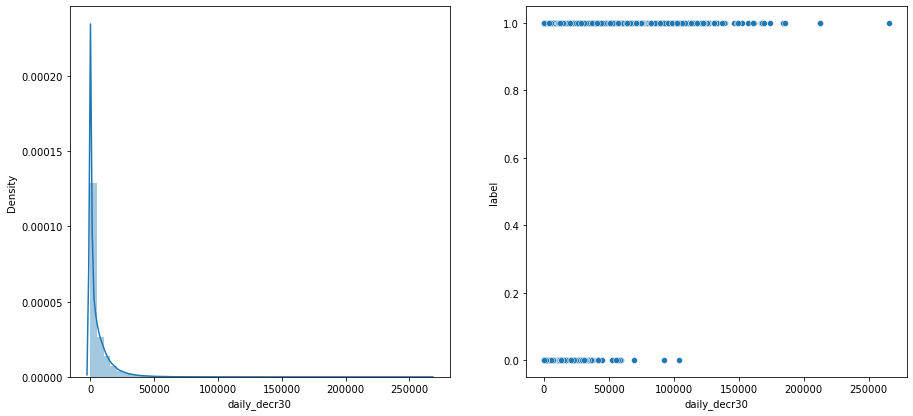

In [20]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['daily_decr30'])
plt.xlabel('daily_decr30')
plt.subplot(222)
sns.scatterplot(x= 'daily_decr30', y= 'label', data= df)
plt.xlabel('daily_decr30')
plt.ylabel('label')
plt.show()

5. daily_decr90

In [21]:
df['daily_decr90'].unique()

array([ 3065.15      , 12124.75      ,  1398.        , ...,
         151.87233333, 12574.37      ,  4534.82      ])

In [22]:
df['daily_decr90'].isnull().sum()

0

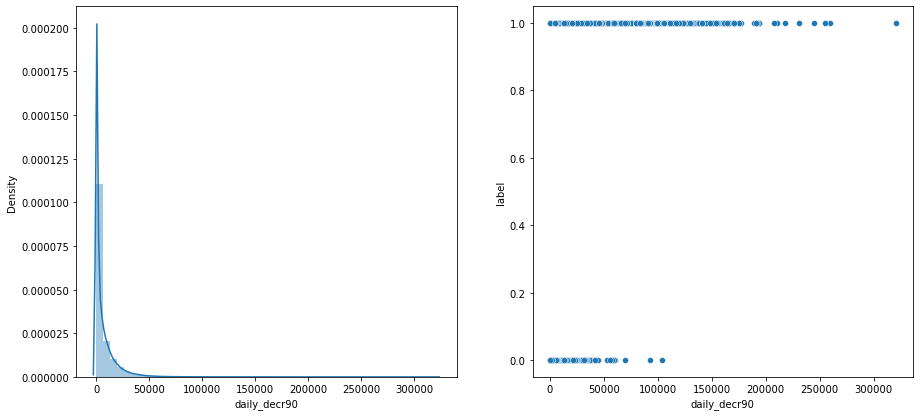

In [23]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['daily_decr90'])
plt.xlabel('daily_decr90')
plt.subplot(222)
sns.scatterplot(x= 'daily_decr90', y= 'label', data= df)
plt.xlabel('daily_decr90')
plt.ylabel('label')
plt.show()

6. rental30

In [24]:
df['rental30'].unique()

array([ 220.13, 3691.26,  900.13, ..., 5861.83,  411.83,  483.92])

In [25]:
df['rental30'].isnull().sum()

0

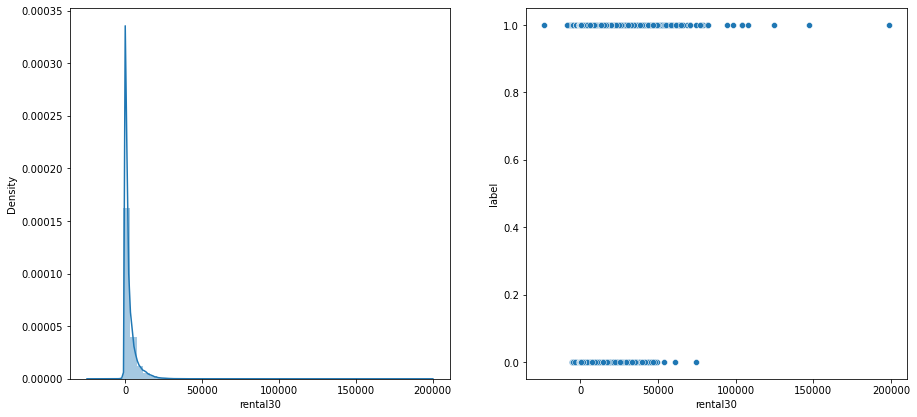

In [26]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['rental30'])
plt.xlabel('rental30')
plt.subplot(222)
sns.scatterplot(x= 'rental30', y= 'label', data= df)
plt.xlabel('rental30')
plt.ylabel('label')
plt.show()

7. rental90

In [27]:
df['rental90'].unique()

array([ 260.13, 3691.26,  900.13, ..., 1728.36, 8893.2 ,  984.58])

In [28]:
df['rental90'].isnull().sum()

0

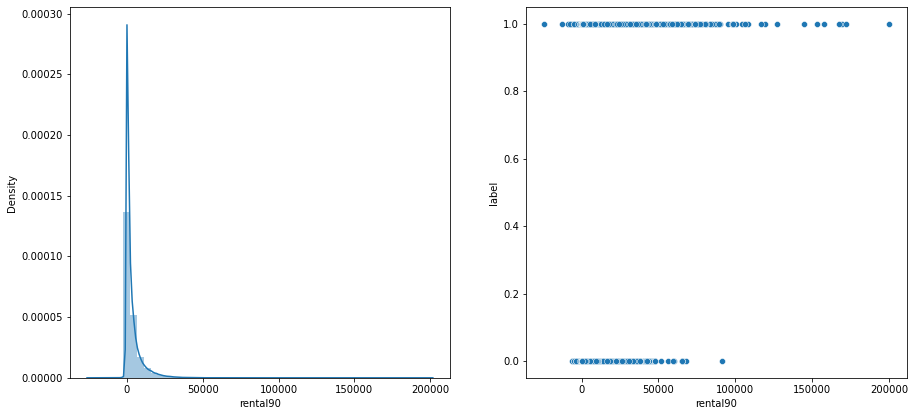

In [29]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['rental90'])
plt.xlabel('rental90')
plt.subplot(222)
sns.scatterplot(x= 'rental90', y= 'label', data= df)
plt.xlabel('rental90')
plt.ylabel('label')
plt.show()

8. last_rech_date_ma

In [30]:
df['last_rech_date_ma'].unique()

array([2.00000000e+00, 2.00000000e+01, 3.00000000e+00, ...,
       7.67980563e+05, 6.11678500e+05, 5.90843122e+05])

In [31]:
df['last_rech_date_ma'].isnull().sum()

0

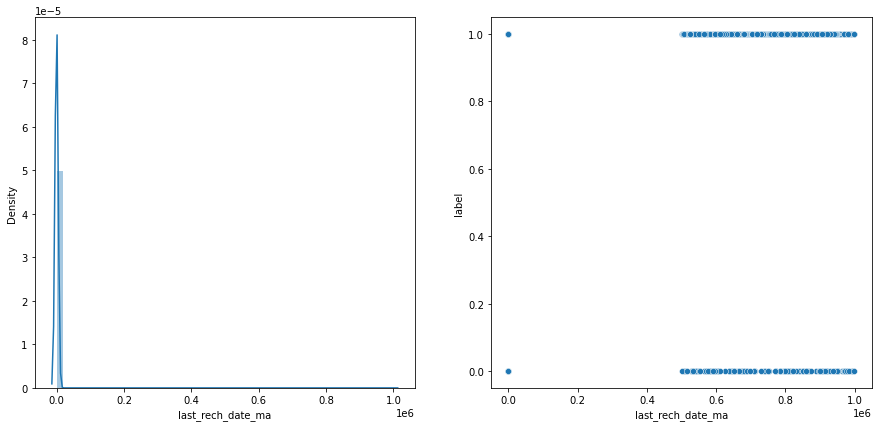

In [32]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['last_rech_date_ma'])
plt.xlabel('last_rech_date_ma')
plt.subplot(222)
sns.scatterplot(x= 'last_rech_date_ma', y= 'label', data= df)
plt.xlabel('last_rech_date_ma')
plt.ylabel('label')
plt.show()

9. last_rech_date_da

In [33]:
df['last_rech_date_da'].unique()

array([0.00000000e+00, 5.50000000e+01, 6.30000000e+01, ...,
       8.09043117e+05, 7.99233445e+05, 6.36529127e+05])

In [34]:
df['last_rech_date_da'].isnull().sum()

0

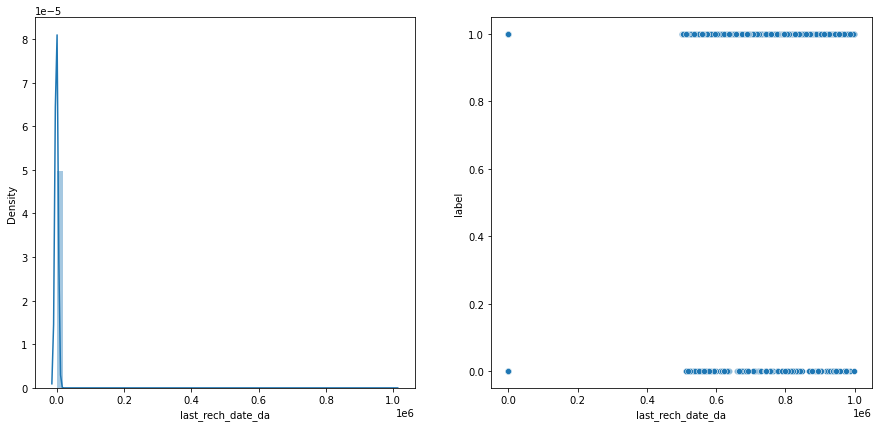

In [35]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['last_rech_date_da'])
plt.xlabel('last_rech_date_da')
plt.subplot(222)
sns.scatterplot(x= 'last_rech_date_da', y= 'label', data= df)
plt.xlabel('last_rech_date_da')
plt.ylabel('label')
plt.show()

10. last_rech_amt_ma

In [36]:
df['last_rech_amt_ma'].unique()

array([ 1539,  5787,   947,  2309,  3178,   773,  7526,  1547,   770,
           0,  4048,  8000,   173,  1924,  2320,  4917,  2593, 10000,
        1720, 11874,  3193, 16000,  1333,  4067,  3467,  5814,  7400,
        7560,   777, 15400,  1933, 17391, 11927,  6960, 21739,  1554,
       11327,  4940, 12500,   790,  5214, 32000, 11900,  9400, 11000,
        1580,  4340,  3466, 55000,   769, 11004,   946,  4066, 19130,
       17467,  4047,   954, 14783,  6222,   177, 19913,  1546,  1923,
       22609,  7999,  1538, 15652,   772, 34783, 10454], dtype=int64)

In [37]:
df['last_rech_amt_ma'].isnull().sum()

0

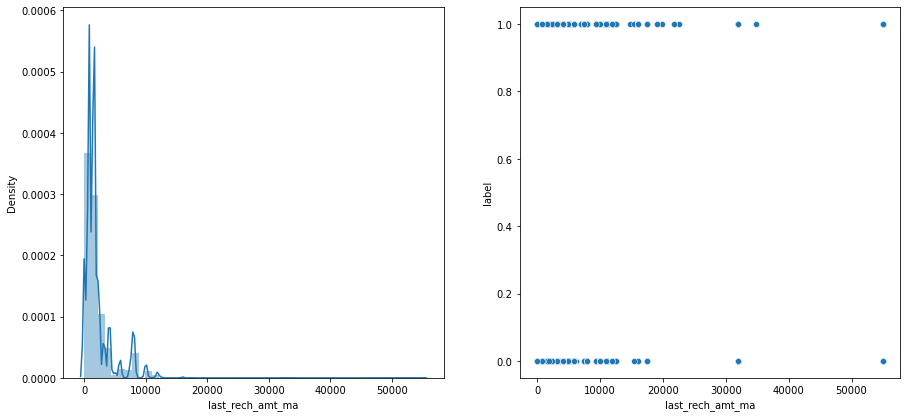

In [38]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['last_rech_amt_ma'])
plt.xlabel('last_rech_amt_ma')
plt.subplot(222)
sns.scatterplot(x= 'last_rech_amt_ma', y= 'label', data= df)
plt.xlabel('last_rech_amt_ma')
plt.ylabel('label')
plt.show()

11. cnt_ma_rech30

In [39]:
df['cnt_ma_rech30'].unique()

array([  2,   1,   0,   7,   4,   3,   5,  15,   6,   9,  10,  11,  13,
         8,  12,  16,  18,  19,  29,  17,  14,  21,  27,  22,  37,  23,
        20,  26,  25,  24,  34,  28,  32,  35,  31,  33,  40,  30,  41,
        36,  52,  38,  48,  61,  39,  54,  84,  42,  44,  46,  45,  47,
        49,  43,  55,  74,  58,  64,  59,  53,  51,  77,  78,  50,  91,
        99, 115, 203,  60,  71,  63], dtype=int64)

In [40]:
df['cnt_ma_rech30'].isnull().sum()

0

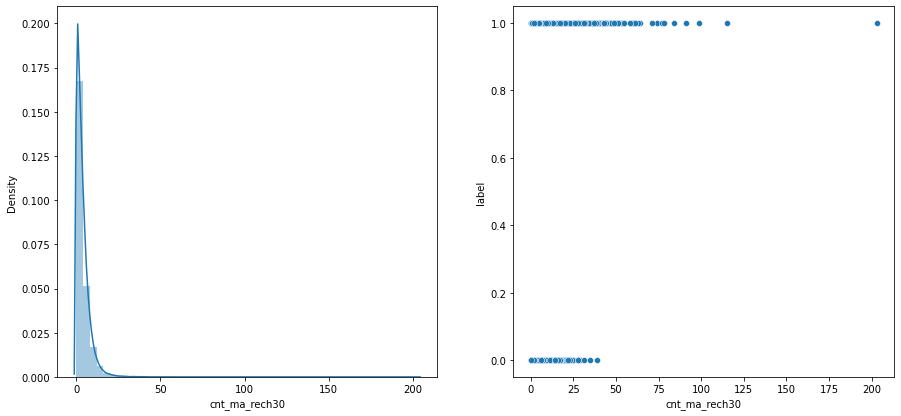

In [41]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['cnt_ma_rech30'])
plt.xlabel('cnt_ma_rech30')
plt.subplot(222)
sns.scatterplot(x= 'cnt_ma_rech30', y= 'label', data= df)
plt.xlabel('cnt_ma_rech30')
plt.ylabel('label')
plt.show()

12. fr_ma_rech30

In [42]:
df['fr_ma_rech30'].unique()

array([2.10000000e+01, 0.00000000e+00, 2.00000000e+00, ...,
       9.05481035e+05, 6.20381981e+05, 7.47564075e+05])

In [43]:
df['fr_ma_rech30'].isnull().sum()

0

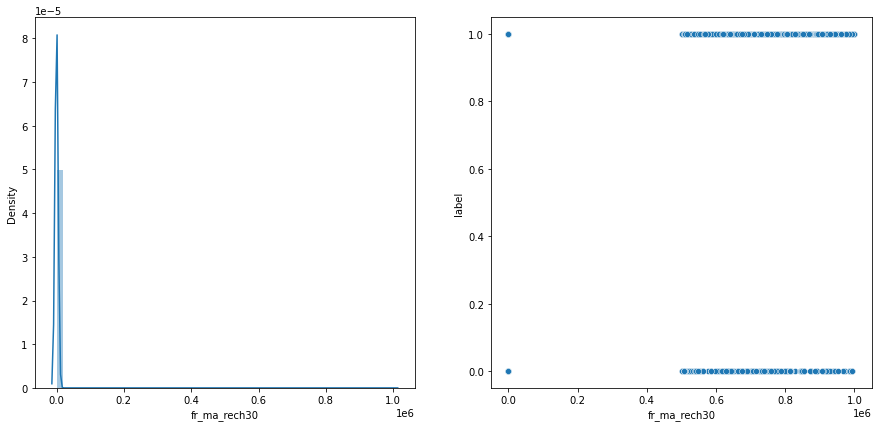

In [44]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['fr_ma_rech30'])
plt.xlabel('fr_ma_rech30')
plt.subplot(222)
sns.scatterplot(x= 'fr_ma_rech30', y= 'label', data= df)
plt.xlabel('fr_ma_rech30')
plt.ylabel('label')
plt.show()

13. sumamnt_ma_rech30

In [45]:
df['sumamnt_ma_rech30'].unique()

array([ 3078.,  5787.,  1539., ..., 49088., 23967., 12154.])

In [46]:
df['sumamnt_ma_rech30'].isnull().sum()

0

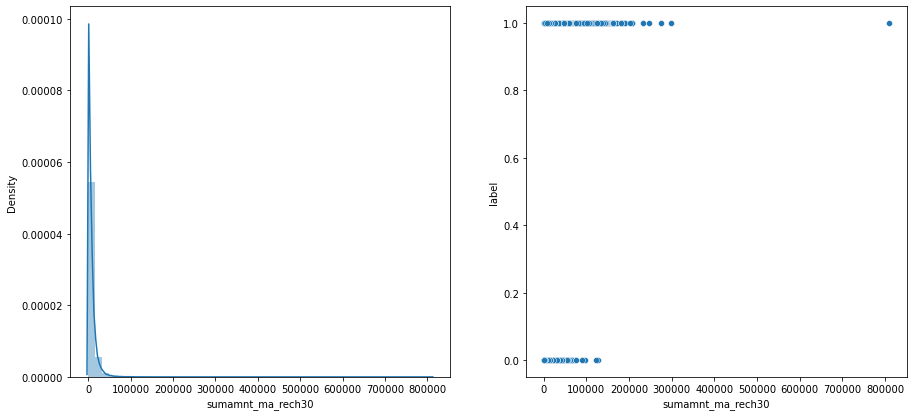

In [47]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['sumamnt_ma_rech30'])
plt.xlabel('sumamnt_ma_rech30')
plt.subplot(222)
sns.scatterplot(x= 'sumamnt_ma_rech30', y= 'label', data= df)
plt.xlabel('sumamnt_ma_rech30')
plt.ylabel('label')
plt.show()

14. medianamnt_ma_rech30

In [48]:
df['medianamnt_ma_rech30'].unique()

array([ 1539. ,  5787. ,     0. ,  2309. ,  3178. ,   773. ,  1156. ,
        4532.5,  4773.5,   770. ,  4769.5,   771.5,  1543. ,   473. ,
        1160. ,  6024. ,  1547. ,  1154.5,  4048. ,  8000. ,  1924. ,
        3178.5,  2020. ,  2793.5,  3613. ,  1243. ,  5352. ,  2593. ,
        4917. ,  7526. ,  1928. ,  2410.5,  2320. ,  7480. ,   173. ,
         947. ,  1158.5,   856. , 10000. ,  1720. ,  2551. ,  4385. ,
        3322.5,   860. ,  5804. ,  8830.5,  1541. ,  1247. ,  1731.5,
        2120. ,  5154.5,  5814. , 11900.5,   471.5,  1353. ,  2743.5,
        3663. ,  1633.5,  2409. ,  4067. , 11874. ,  1539.5,  4149.5,
        1347. ,  1158. ,  6670. ,  7763. ,  3622.5,  3855.5,  2370. ,
        3467. ,  1928.5,  6706.5,  1974. ,  4482.5,  6589. ,  1821. ,
        2358.5,  1176.5,  7091.5,  2314.5,  7400. ,  9937. ,  5733.5,
        4917.5,  6893.5, 15400. ,  5589. ,  1933. ,   858.5,  4148. ,
        3228. ,  2986. ,  2014.5,  3278.5,  4536.5,  2070. ,  1333. ,
       16000. ,  449

In [49]:
df['medianamnt_ma_rech30'].isnull().sum()

0

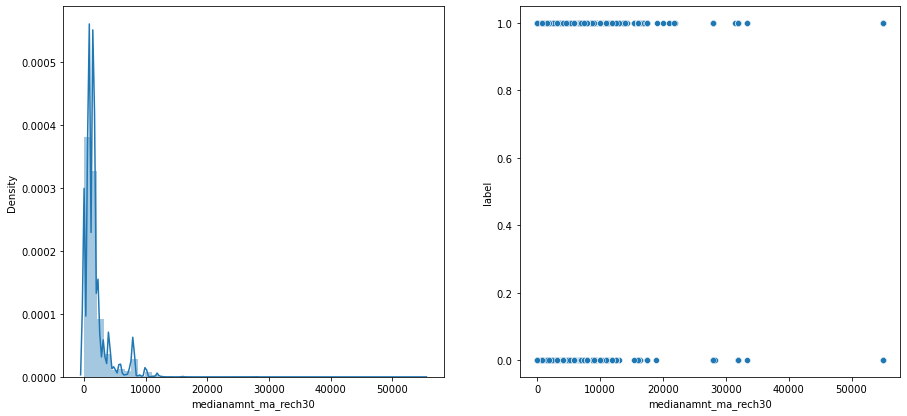

In [50]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['medianamnt_ma_rech30'])
plt.xlabel('medianamnt_ma_rech30')
plt.subplot(222)
sns.scatterplot(x= 'medianamnt_ma_rech30', y= 'label', data= df)
plt.xlabel('medianamnt_ma_rech30')
plt.ylabel('label')
plt.show()

15. medianmarechprebal30

In [51]:
df['medianmarechprebal30'].unique()

array([  7.5 ,  61.04,  66.32, ..., 490.07, 260.17,  71.37])

In [52]:
df['medianmarechprebal30'].isnull().sum()

0

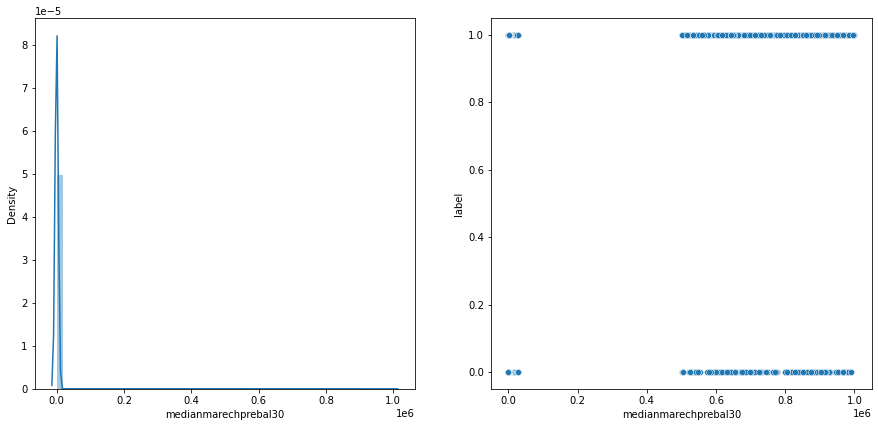

In [53]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['medianmarechprebal30'])
plt.xlabel('medianmarechprebal30')
plt.subplot(222)
sns.scatterplot(x= 'medianmarechprebal30', y= 'label', data= df)
plt.xlabel('medianmarechprebal30')
plt.ylabel('label')
plt.show()

16. cnt_ma_rech90

In [54]:
df['cnt_ma_rech90'].unique()

array([  2,   1,   8,   9,   4,   7,   0,   3,  19,  10,   6,  20,  11,
        16,  15,   5,  18,  14,  13,  12,  34,  30,  17,  25,  26,  23,
        33,  27,  22,  70,  40,  21,  39,  24,  35,  28,  37,  31,  29,
        43,  45,  48,  63,  42,  32,  36,  46,  59,  38,  53,  57,  51,
        62,  49,  58,  41,  64,  83,  82,  67,  50,  60,  47,  90,  97,
        54,  44,  56,  73, 172,  74,  71,  78,  52, 118,  69,  68,  61,
        55,  92,  75,  80,  77,  99,  65,  79,  94,  72,  66,  93,  85,
        86, 140, 110,  84,  81, 105, 100,  98, 121, 132,  88, 127,  96,
       336, 151, 104,  91,  87, 120], dtype=int64)

In [55]:
df['cnt_ma_rech90'].isnull().sum()

0

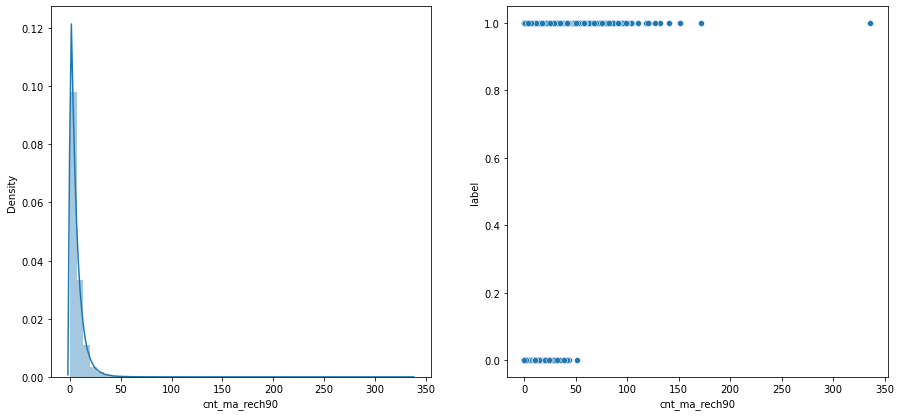

In [56]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['cnt_ma_rech90'])
plt.xlabel('cnt_ma_rech90')
plt.subplot(222)
sns.scatterplot(x= 'cnt_ma_rech90', y= 'label', data= df)
plt.xlabel('cnt_ma_rech90')
plt.ylabel('label')
plt.show()

17. fr_ma_rech90

In [57]:
df['fr_ma_rech90'].unique()

array([21,  0,  2,  3,  1,  5, 30, 10, 26,  8, 31, 64, 66, 12, 32, 15,  7,
       18,  4,  9, 57, 50, 67, 11,  6, 44, 41, 45, 35, 40, 33, 34, 37, 22,
       23, 17, 36, 42, 25, 20, 13, 14, 47, 46, 51, 16, 39, 48, 59, 24, 38,
       19, 55, 62, 52, 65, 29, 74, 28, 71, 54, 56, 60, 43, 49, 27, 70, 53,
       73, 78, 68, 58, 79, 69, 61, 72, 85, 77, 75, 80, 63, 86, 83, 76, 88,
       82, 84, 81, 87], dtype=int64)

In [58]:
df['fr_ma_rech90'].isnull().sum()

0

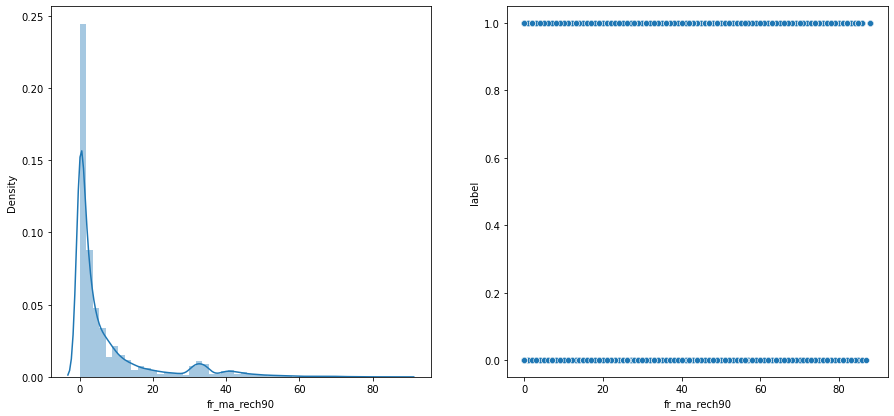

In [59]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['fr_ma_rech90'])
plt.xlabel('fr_ma_rech90')
plt.subplot(222)
sns.scatterplot(x= 'fr_ma_rech90', y= 'label', data= df)
plt.xlabel('fr_ma_rech90')
plt.ylabel('label')
plt.show()

18. sumamnt_ma_rech90

In [60]:
df['sumamnt_ma_rech90'].unique()

array([ 3078,  5787,  1539, ..., 36422, 52487, 17941], dtype=int64)

In [61]:
df['sumamnt_ma_rech90'].isnull().sum()

0

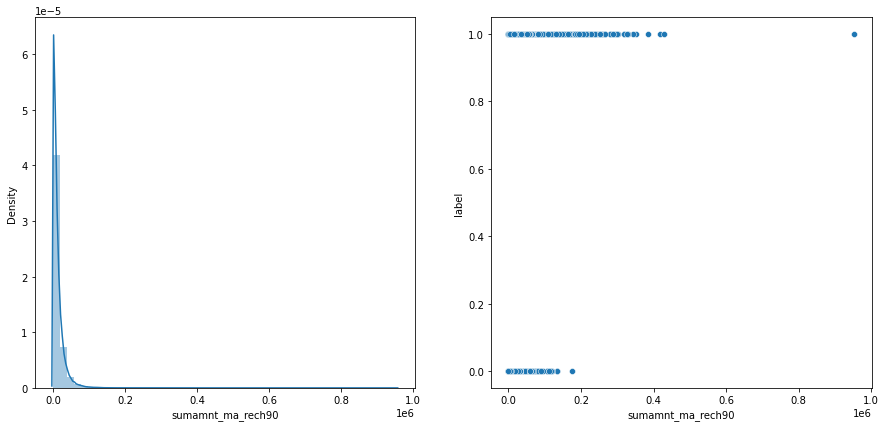

In [62]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['sumamnt_ma_rech90'])
plt.xlabel('sumamnt_ma_rech90')
plt.subplot(222)
sns.scatterplot(x= 'sumamnt_ma_rech90', y= 'label', data= df)
plt.xlabel('sumamnt_ma_rech90')
plt.ylabel('label')
plt.show()

19. medianamnt_ma_rech90

In [63]:
df['medianamnt_ma_rech90'].unique()

array([ 1539. ,  5787. ,   947. ,  2888. ,  3178. ,   773. ,  1156. ,
        4532.5,  1720. ,     0. ,  4769.5,   771.5,   770. ,  3178.5,
        1543. ,  1160. ,  2309. ,  4048. ,  6024. ,  1247. ,  1924. ,
        2803. ,  8000. ,  3278.5,   173. , 10250. ,  2020. ,  3193. ,
        1243. ,  1547. ,  3613. ,  3855.5,  2358.5,  5359.5,  1928. ,
        1541. ,  2410.5,  2320. ,  1731.5,  9937. ,  7480. ,   473. ,
        1154.5,  4773.5,  1158.5,   856. , 10000. ,  4067. ,  2593. ,
        5804. ,  3676.5,  1333. ,  3467. ,  5154.5,  5814. , 11874. ,
         471.5,  1353. ,  3569. ,  1929.5,  1633.5,   858.5,  2409. ,
        2314.5,  2551. ,  7763. ,  4149.5,  4917. ,  9663.5,  1546.5,
        1347. ,  2743.5,  6670. ,  3757.5,  2793.5,  3622.5,  2749. ,
         860. ,  2893. ,  1539.5,  2370. ,  4473.5,  1736. ,  2507. ,
        1821. ,   772.5,  7526. ,  2797.5,  1928.5,  4496. ,  1683. ,
        7400. ,  2451. ,  2014.5,  1974. ,  3293.5, 16000. ,  2362.5,
        4385. ,  405

In [64]:
df['medianamnt_ma_rech90'].isnull().sum()

0

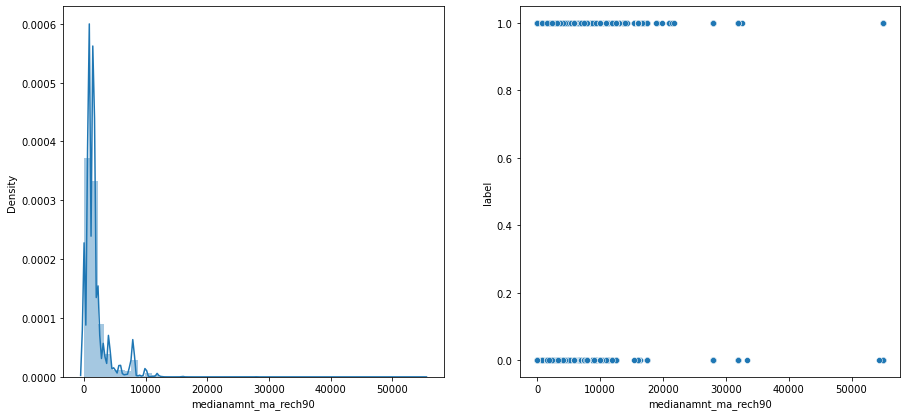

In [65]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['medianamnt_ma_rech90'])
plt.xlabel('medianamnt_ma_rech90')
plt.subplot(222)
sns.scatterplot(x= 'medianamnt_ma_rech90', y= 'label', data= df)
plt.xlabel('medianamnt_ma_rech90')
plt.ylabel('label')
plt.show()

20. medianmarechprebal90

In [66]:
df['medianmarechprebal90'].unique()

array([  7.5 ,  61.04,  66.32, ...,  27.66, 118.97, 392.2 ])

In [67]:
df['medianmarechprebal90'].isnull().sum()

0

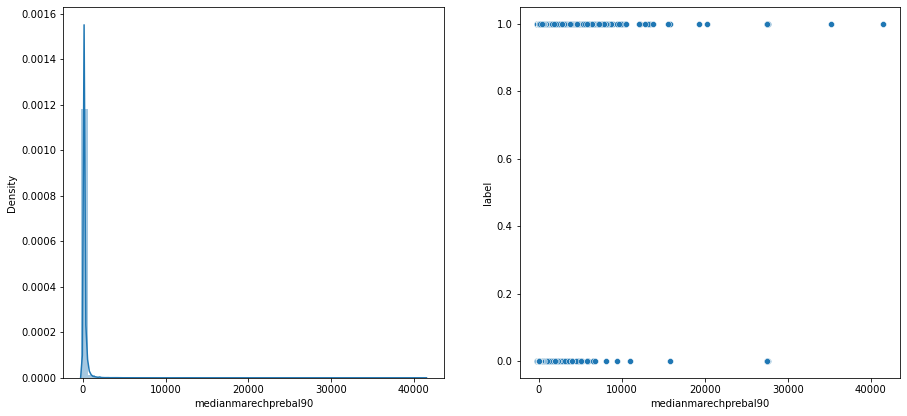

In [68]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['medianmarechprebal90'])
plt.xlabel('medianmarechprebal90')
plt.subplot(222)
sns.scatterplot(x= 'medianmarechprebal90', y= 'label', data= df)
plt.xlabel('medianmarechprebal90')
plt.ylabel('label')
plt.show()

21. cnt_da_rech30

In [69]:
df['cnt_da_rech30'].unique()

array([    0.        , 30721.46377061, 91764.39171424, ...,
       45457.72373676, 35132.66812544, 61002.42134533])

In [70]:
df['cnt_da_rech30'].isnull().sum()

0

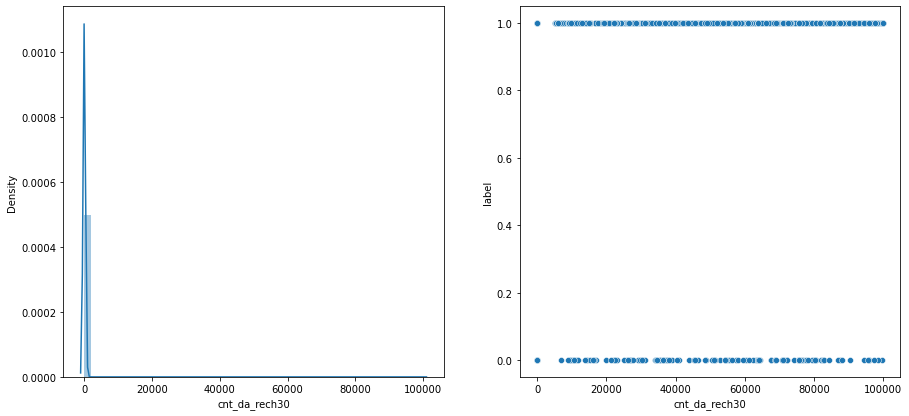

In [71]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['cnt_da_rech30'])
plt.xlabel('cnt_da_rech30')
plt.subplot(222)
sns.scatterplot(x= 'cnt_da_rech30', y= 'label', data= df)
plt.xlabel('cnt_da_rech30')
plt.ylabel('label')
plt.show()

22. fr_da_rech30

In [72]:
df['fr_da_rech30'].unique()

array([0.00000000e+00, 7.23845092e+05, 9.00000000e+00, ...,
       7.44924811e+05, 7.04094118e+05, 5.09386303e+05])

In [73]:
df['fr_da_rech30'].isnull().sum()

0

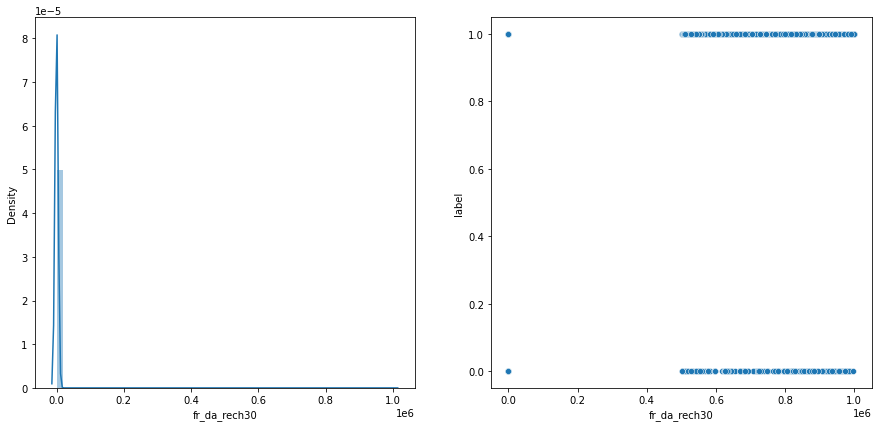

In [74]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['fr_da_rech30'])
plt.xlabel('fr_da_rech30')
plt.subplot(222)
sns.scatterplot(x= 'fr_da_rech30', y= 'label', data= df)
plt.xlabel('fr_da_rech30')
plt.ylabel('label')
plt.show()

23. cnt_da_rech90

In [75]:
df['cnt_da_rech90'].unique()

array([ 0,  1,  3,  2,  5,  6,  8,  4, 27,  7,  9, 14, 12, 22, 13, 10, 16,
       19, 11, 15, 38, 18, 20, 30, 28, 25, 17], dtype=int64)

In [76]:
df['cnt_da_rech90'].isnull().sum()

0

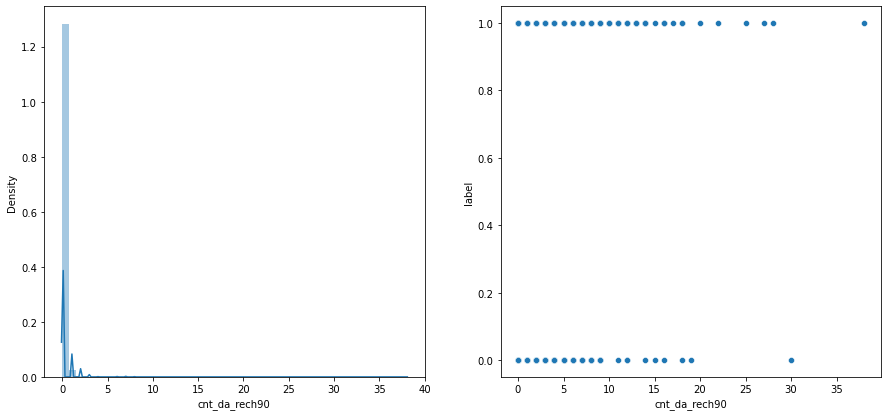

In [77]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['cnt_da_rech90'])
plt.xlabel('cnt_da_rech90')
plt.subplot(222)
sns.scatterplot(x= 'cnt_da_rech90', y= 'label', data= df)
plt.xlabel('cnt_da_rech90')
plt.ylabel('label')
plt.show()

24. fr_da_rech90

In [78]:
df['fr_da_rech90'].unique()

array([ 0, 16,  8,  5, 11,  4,  6, 27, 29,  3,  9, 19, 24, 57,  1, 35, 28,
       30,  7, 18, 13, 37,  2, 17, 14, 10, 12, 22, 15, 21, 42, 20, 23, 26,
       25, 34, 32, 39, 31, 33, 43, 56, 46, 41, 55, 64], dtype=int64)

In [79]:
df['fr_da_rech90'].isnull().sum()

0

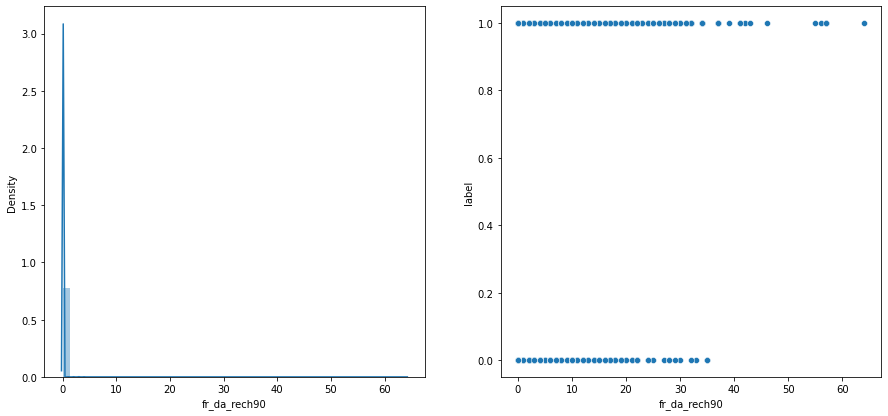

In [80]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['fr_da_rech90'])
plt.xlabel('fr_da_rech90')
plt.subplot(222)
sns.scatterplot(x= 'fr_da_rech90', y= 'label', data= df)
plt.xlabel('fr_da_rech90')
plt.ylabel('label')
plt.show()

25. cnt_loans30

In [81]:
df['cnt_loans30'].unique()

array([ 2,  1,  7,  3,  4,  5,  8,  6, 10, 12,  0, 11,  9, 21, 17, 15, 19,
       13, 18, 25, 22, 20, 16, 14, 28, 29, 23, 33, 30, 26, 36, 31, 27, 24,
       32, 38, 41, 44, 50, 35], dtype=int64)

In [82]:
df['cnt_loans30'].isnull().sum()

0

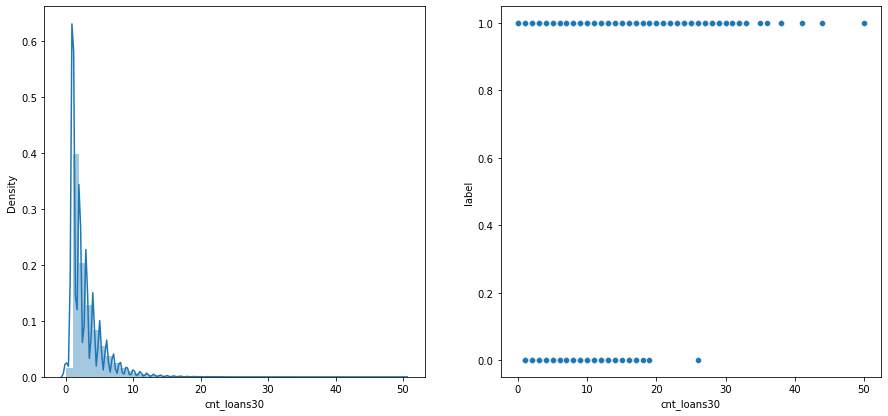

In [83]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['cnt_loans30'])
plt.xlabel('cnt_loans30')
plt.subplot(222)
sns.scatterplot(x= 'cnt_loans30', y= 'label', data= df)
plt.xlabel('cnt_loans30')
plt.ylabel('label')
plt.show()

26. amnt_loans30

In [84]:
df['amnt_loans30'].unique()

array([ 12,   6,  42,  18,  24,  30,  48,  54,  36,  60,  72,   0,  66,
       114, 102, 126,  90, 156,  78, 108,  84, 150, 132,  96, 120, 180,
       228, 138, 174, 162, 168, 144, 276, 198, 306, 222, 210, 186, 270,
       258, 216, 264, 192, 252, 246, 300, 240, 204], dtype=int64)

In [85]:
df['amnt_loans30'].isnull().sum()

0

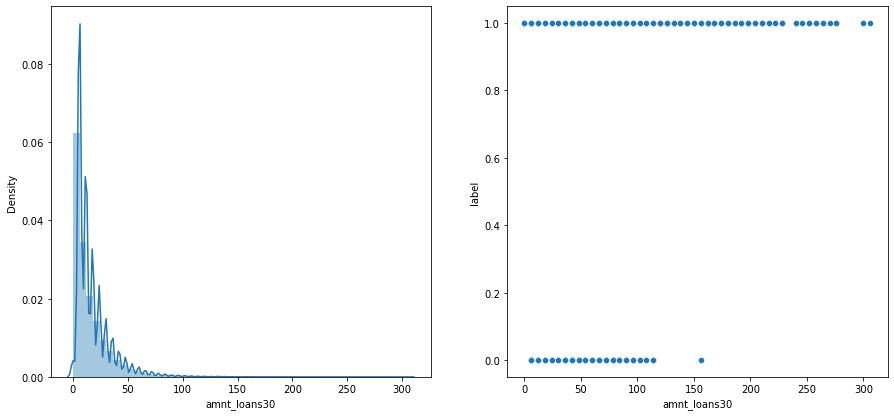

In [86]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['amnt_loans30'])
plt.xlabel('amnt_loans30')
plt.subplot(222)
sns.scatterplot(x= 'amnt_loans30', y= 'label', data= df)
plt.xlabel('amnt_loans30')
plt.ylabel('label')
plt.show()

27. maxamnt_loans30

In [87]:
df['maxamnt_loans30'].unique()

array([6.00000000e+00, 1.20000000e+01, 0.00000000e+00, ...,
       9.28645017e+04, 5.42592657e+04, 9.69272433e+04])

In [88]:
df['maxamnt_loans30'].isnull().sum()

0

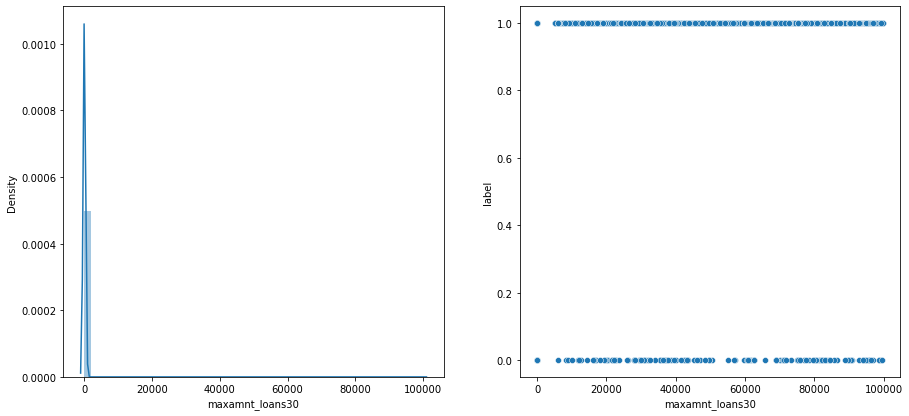

In [89]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['maxamnt_loans30'])
plt.xlabel('maxamnt_loans30')
plt.subplot(222)
sns.scatterplot(x= 'maxamnt_loans30', y= 'label', data= df)
plt.xlabel('maxamnt_loans30')
plt.ylabel('label')
plt.show()

28. medianamnt_loans30

In [90]:
df['medianamnt_loans30'].unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [91]:
df['medianamnt_loans30'].isnull().sum()

0

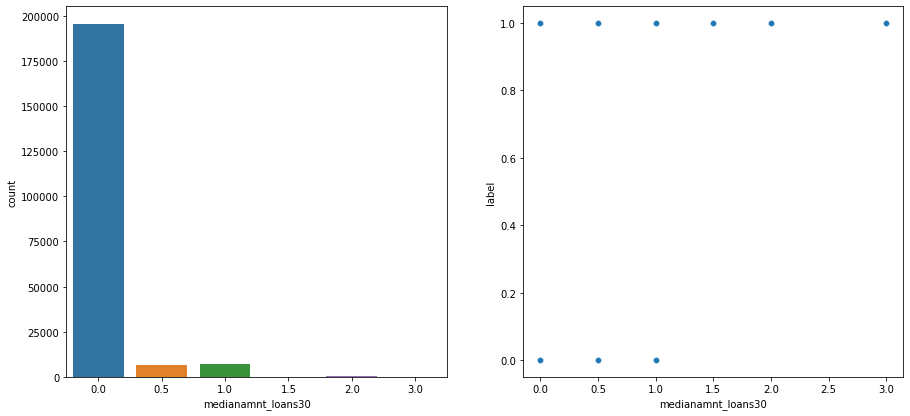

In [92]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['medianamnt_loans30'])
plt.xlabel('medianamnt_loans30')
plt.subplot(222)
sns.scatterplot(x= 'medianamnt_loans30', y= 'label', data= df)
plt.xlabel('medianamnt_loans30')
plt.ylabel('label')
plt.show()

29. cnt_loans90

In [93]:
df['cnt_loans90'].unique()

array([2.00000000e+00, 1.00000000e+00, 7.00000000e+00, ...,
       3.02706822e+03, 4.47977118e+03, 2.04790245e+03])

In [94]:
df['cnt_loans90'].isnull().sum()

0

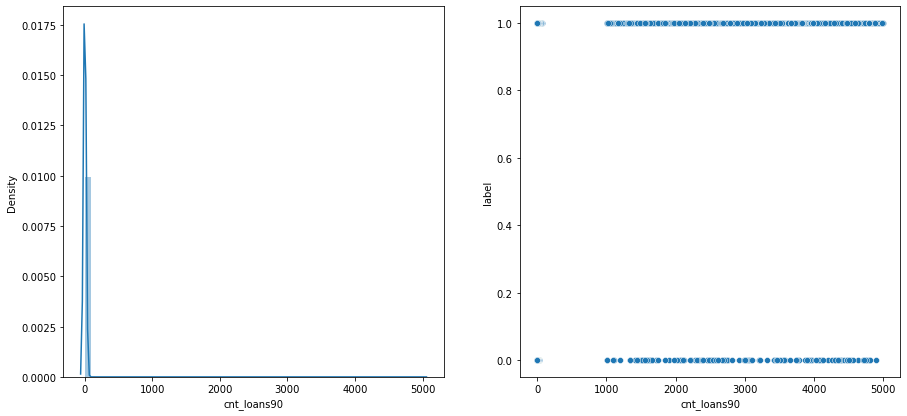

In [95]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['cnt_loans90'])
plt.xlabel('cnt_loans90')
plt.subplot(222)
sns.scatterplot(x= 'cnt_loans90', y= 'label', data= df)
plt.xlabel('cnt_loans90')
plt.ylabel('label')
plt.show()

30. amnt_loans90

In [96]:
df['amnt_loans90'].unique()

array([ 12,   6,  42,  18,  24,  30,  48, 108,  36,  60,  78,  54,  72,
         0, 204, 162,  84, 132,  66,  90, 102, 300, 138, 168,  96, 114,
       156, 120, 126, 144, 180, 198, 174, 216, 192, 276, 150, 234, 228,
       312, 222, 384, 186, 240, 252, 408, 288, 210, 306, 354, 258, 270,
       396, 246, 342, 264, 378, 426, 294, 438, 330, 318, 360, 324, 348,
       372, 282, 402, 336], dtype=int64)

In [97]:
df['amnt_loans90'].isnull().sum()

0

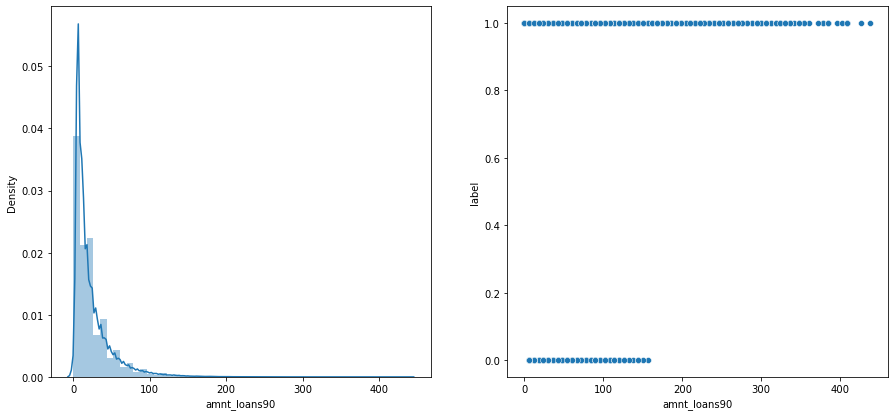

In [98]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['amnt_loans90'])
plt.xlabel('amnt_loans90')
plt.subplot(222)
sns.scatterplot(x= 'amnt_loans90', y= 'label', data= df)
plt.xlabel('amnt_loans90')
plt.ylabel('label')
plt.show()

31. maxamnt_loans90

In [99]:
df['maxamnt_loans90'].unique()

array([ 6, 12,  0], dtype=int64)

In [100]:
df['maxamnt_loans90'].isnull().sum()

0

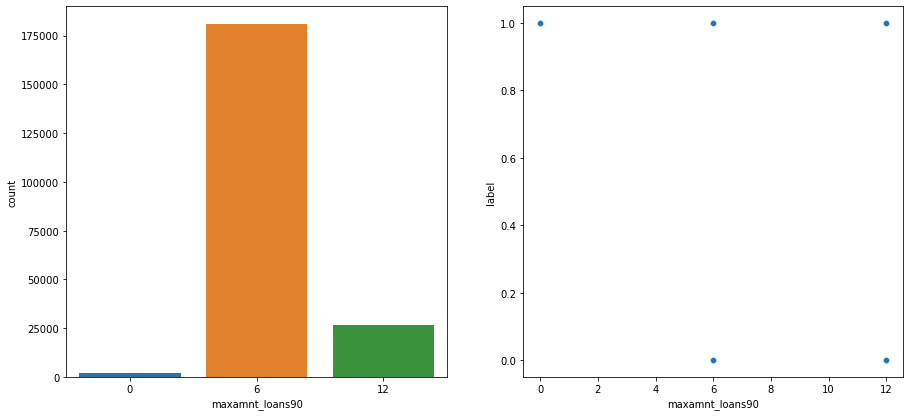

In [101]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['maxamnt_loans90'])
plt.xlabel('maxamnt_loans90')
plt.subplot(222)
sns.scatterplot(x= 'maxamnt_loans90', y= 'label', data= df)
plt.xlabel('maxamnt_loans90')
plt.ylabel('label')
plt.show()

32. medianamnt_loans90

In [102]:
df['medianamnt_loans90'].unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [103]:
df['medianamnt_loans90'].isnull().sum()

0

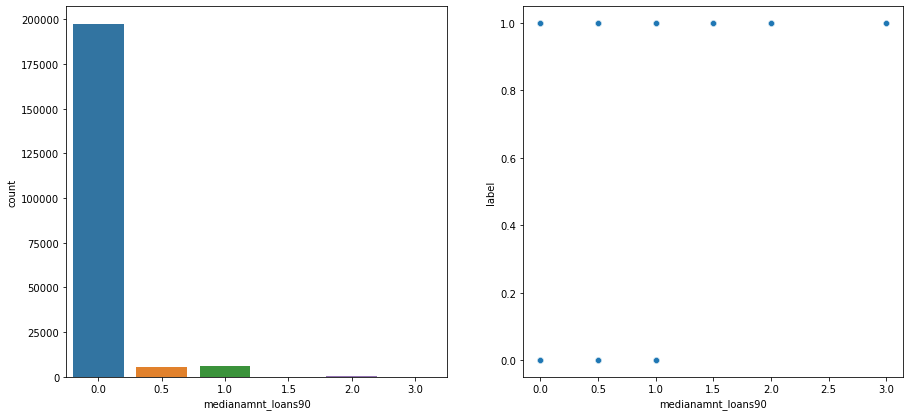

In [104]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['medianamnt_loans90'])
plt.xlabel('medianamnt_loans90')
plt.subplot(222)
sns.scatterplot(x= 'medianamnt_loans90', y= 'label', data= df)
plt.xlabel('medianamnt_loans90')
plt.ylabel('label')
plt.show()

33. payback30

In [105]:
df['payback30'].unique()

array([29.        ,  0.        ,  2.33333333, ..., 56.75      ,
       64.33333333,  5.61538462])

In [106]:
df['payback30'].isnull().sum()

0

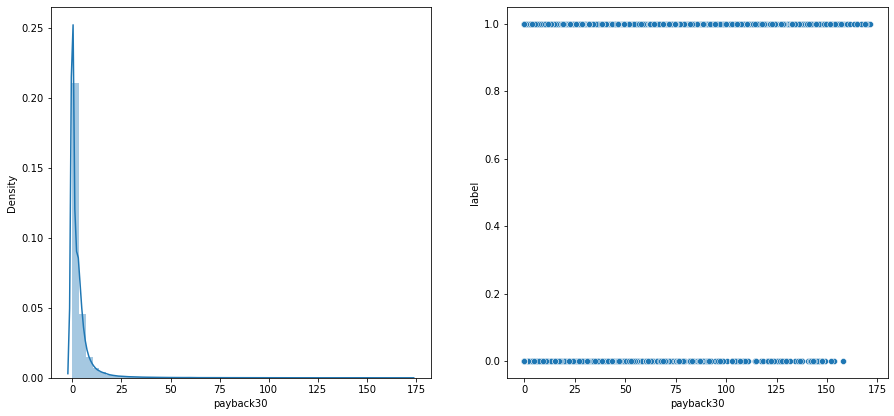

In [107]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['payback30'])
plt.xlabel('payback30')
plt.subplot(222)
sns.scatterplot(x= 'payback30', y= 'label', data= df)
plt.xlabel('payback30')
plt.ylabel('label')
plt.show()

34. payback90

In [108]:
df['payback90'].unique()

array([29.        ,  0.        ,  2.33333333, ..., 64.33333333,
        5.23529412, 25.84615385])

In [109]:
df['payback90'].isnull().sum()

0

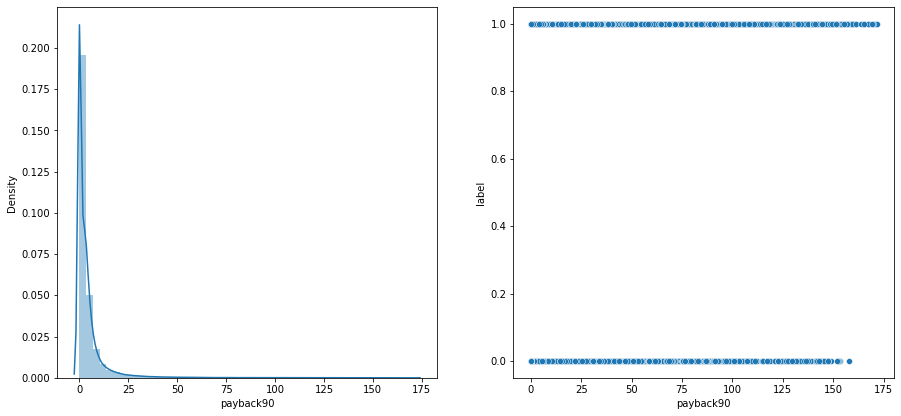

In [110]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(df['payback90'])
plt.xlabel('payback90')
plt.subplot(222)
sns.scatterplot(x= 'payback90', y= 'label', data= df)
plt.xlabel('payback90')
plt.ylabel('label')
plt.show()

35. pcircle

In [111]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [112]:
df['pcircle'].isnull().sum()

0

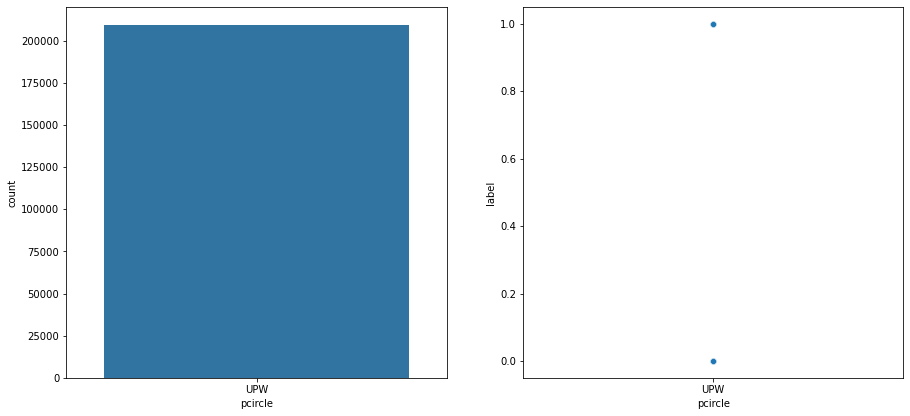

In [113]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['pcircle'])
plt.xlabel('pcircle')
plt.subplot(222)
sns.scatterplot(x= 'pcircle', y= 'label', data= df)
plt.xlabel('pcircle')
plt.ylabel('label')
plt.show()

36. pdate

In [114]:
df['pdate'].unique()

array(['2016-07-20', '2016-08-10', '2016-08-19', '2016-06-06',
       '2016-06-22', '2016-07-02', '2016-07-05', '2016-08-05',
       '2016-06-15', '2016-06-08', '2016-06-12', '2016-06-20',
       '2016-06-29', '2016-06-16', '2016-08-03', '2016-06-24',
       '2016-07-04', '2016-07-03', '2016-07-01', '2016-08-08',
       '2016-06-26', '2016-06-23', '2016-07-06', '2016-07-09',
       '2016-06-10', '2016-06-07', '2016-06-27', '2016-08-11',
       '2016-06-30', '2016-06-19', '2016-07-26', '2016-08-14',
       '2016-06-14', '2016-06-21', '2016-06-25', '2016-06-28',
       '2016-06-11', '2016-07-27', '2016-07-23', '2016-08-16',
       '2016-08-15', '2016-06-02', '2016-06-05', '2016-08-02',
       '2016-07-28', '2016-07-18', '2016-08-18', '2016-07-16',
       '2016-07-29', '2016-07-21', '2016-06-03', '2016-06-13',
       '2016-08-01', '2016-07-13', '2016-07-10', '2016-06-09',
       '2016-07-15', '2016-07-11', '2016-08-09', '2016-08-12',
       '2016-07-22', '2016-06-04', '2016-07-24', '2016-

In [115]:
ab = []
for i in df['pdate']:
    i = i[5:7]
    ab.append(i)

In [116]:
df['pmonth'] = pd.Series(ab)

In [117]:
df['pmonth'].unique()

array(['07', '08', '06'], dtype=object)

In [118]:
df['pmonth'].isnull().sum()

0

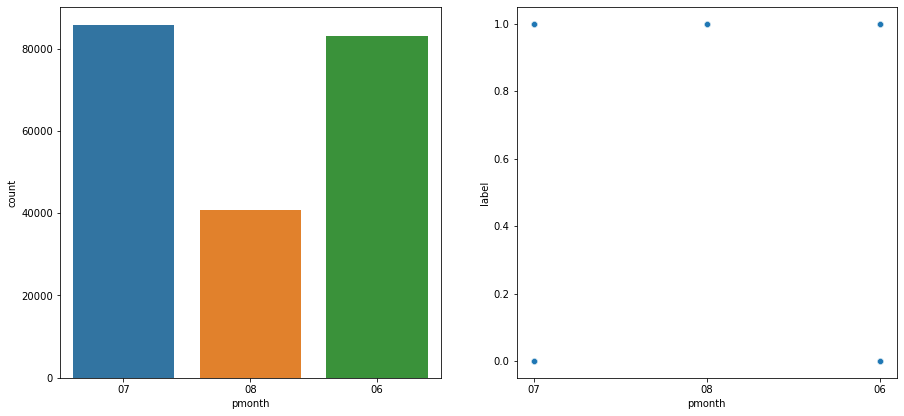

In [119]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(df['pmonth'])
plt.xlabel('pmonth')
plt.subplot(222)
sns.scatterplot(x= 'pmonth', y= 'label', data= df)
plt.xlabel('pmonth')
plt.ylabel('label')
plt.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [121]:
df['msisdn'].unique()

array(['2', '7', '1', '5', '0', '3', '9', '8', '6', '4'], dtype=object)

In [122]:
df['msisdn'] = pd.to_numeric(df['msisdn'])

In [123]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [124]:
df['pcircle'] = df['pcircle'].replace(['UPW'],[1])

In [125]:
df['pmonth'].unique()

array(['07', '08', '06'], dtype=object)

In [126]:
df['pmonth'] = pd.to_numeric(df['pmonth'])

In [127]:
df.drop(['pdate'], axis= 1, inplace= True)

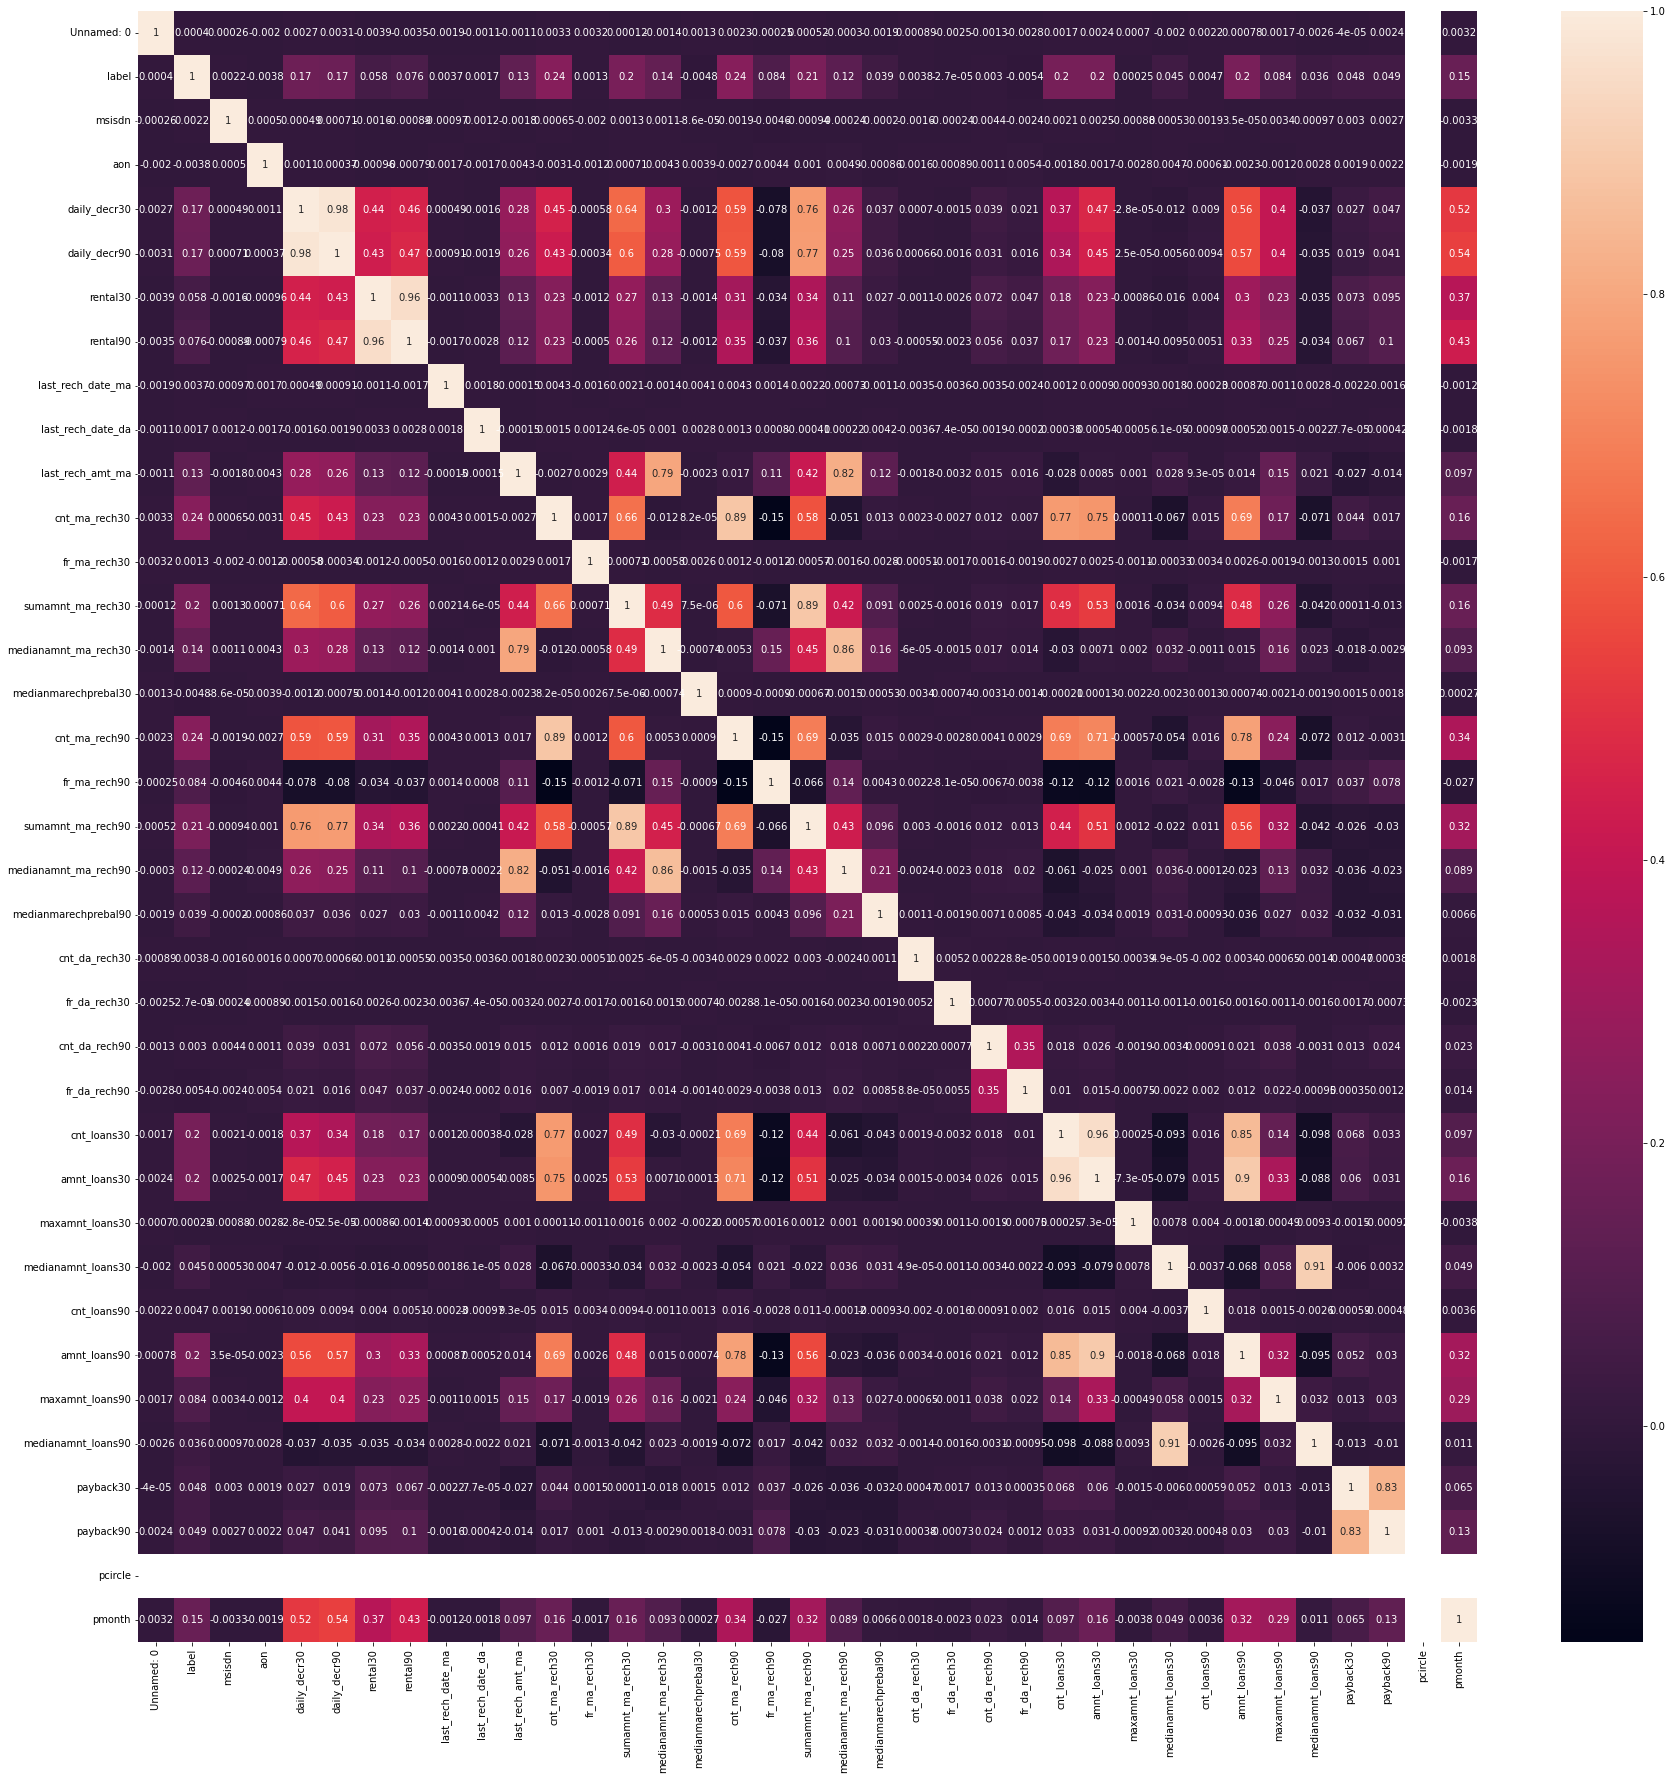

In [128]:
plt.figure(figsize= [30,30])
sns.heatmap(df.corr(), annot= True)
plt.show()

In [129]:
df.drop(['pcircle','payback30','medianamnt_loans90','cnt_da_rech90', 'fr_ma_rech90', 'rental30'], axis= 1, inplace= True)

In [130]:
X = df.drop(['label'], axis= 1)
y = df['label']

1. Logistic Regression Model

In [131]:
scaler = StandardScaler()
lr = LogisticRegression()
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 101)

In [133]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [137]:
lrf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5]}, scoring='accuracy')

In [138]:
print('training score : ', lrf.score(scaledX_train, y_train))
print('testing score : ', lrf.score(scaledX_test, y_test))

training score :  0.8757454929625464
testing score :  0.874121314291167


In [139]:
lrf.best_params_

{'C': 5}

2. Decision Tree Classification Model

In [140]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [141]:
dtf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [142]:
print('training score : ', dtf.score(scaledX_train, y_train))
print('testing score : ', dtf.score(scaledX_test, y_test))

training score :  0.9088504924513513
testing score :  0.9064219599860046


In [143]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

3. Random Forest Classification Model 

In [144]:
rf = RandomForestClassifier(criterion= 'entropy')
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [145]:
rff.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [146]:
print('training score : ', rff.score(scaledX_train, y_train))
print('testing score : ', rff.score(scaledX_test, y_test))

training score :  0.9024230651262652
testing score :  0.9017939501892553


In [147]:
rff.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

4. Bagging Classification Model

In [148]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2))
bcf = GridSearchCV(bc, param_grid= {'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [149]:
bcf.fit(scaledX_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=5)),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [150]:
print('training score : ', bcf.score(scaledX_train, y_train))
print('testing score : ', bcf.score(scaledX_test, y_test))

training score :  0.8755819105067648
testing score :  0.8742326409873088


In [151]:
bcf.best_params_

{'max_features': 1, 'max_samples': 1}

#### Best model is Decision Tree Classification for this dataset.

In [134]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2)

In [135]:
pred = dt.fit(scaledX_train, y_train).predict(scaledX_test)

In [136]:
a = pd.DataFrame({'Actual': y_test, 'Prediction': pred})

In [137]:
a.head()

,Actual,Prediction
6703,1,1
133760,0,0
23035,1,1
198698,1,1
117982,1,1


####    metrices

In [138]:
print('accuracy score : ', metrics.accuracy_score(y_test, pred))

accuracy score :  0.9064219599860046


In [139]:
print('cohen kappa score : ', metrics.cohen_kappa_score(y_test, pred))

cohen kappa score :  0.4763807855120009


In [140]:
print('confusion matrix : ')
metrics.confusion_matrix(y_test, pred)

confusion matrix : 


array([[ 3236,  4672],
       [ 1212, 53758]], dtype=int64)

#### saving model

In [141]:
save_c = pickle.dumps(dt)